# The Post Correspondence Problem

****

<h5>What is the Post Correspondence Problem</h5>

Post Correspondence Problem is an undecidable problem that was introduced by Emil Leon Post in 1946. It is simpler than Halting Problem and the Entscheidungsproblem and is often used in proofs of undecidability.

<br>

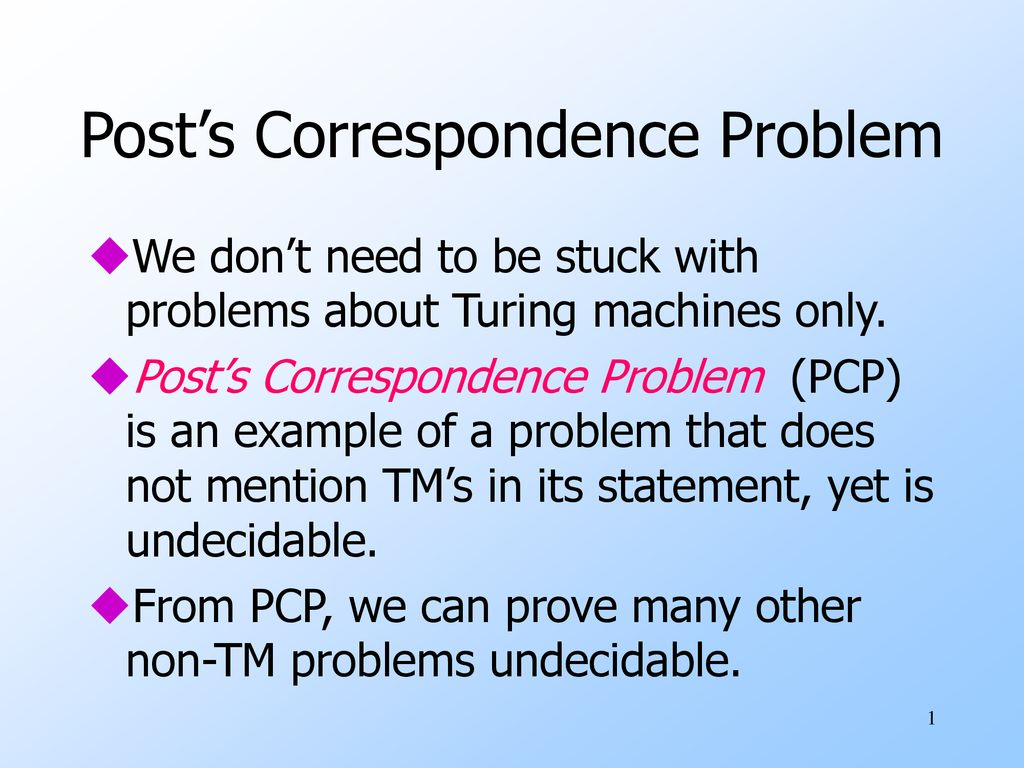

<br>

<h5>A Definition of the Problem</h5>

∑ is the alphabet with at least two symbols (M and N), the input of each symbol containing of two finite lists of non-empty strings over the alphabet.

M = (x1, x2, x3,………, xn)

N = (y1, y2, y3,………, yn)

One solution to this very problem is a series of indices i1,i2,………… ik, where 1 ≤ ij ≤ n, the condition xi1 …….xik = yi1 …….yik satisfies.

The decision problem then is to decide whether such a solution exists or not.

<h5>An Example of the Problem</h5>

Let's say we have a select number of marbles and we need to arrange the marbles in a certain order that the string made by Numerators is same as the string made by Denominators. In laymans terms, we have two lists containing a select number of characters and the goal is to find the concatenation of the characters in a particular series so both lists produce the same result.

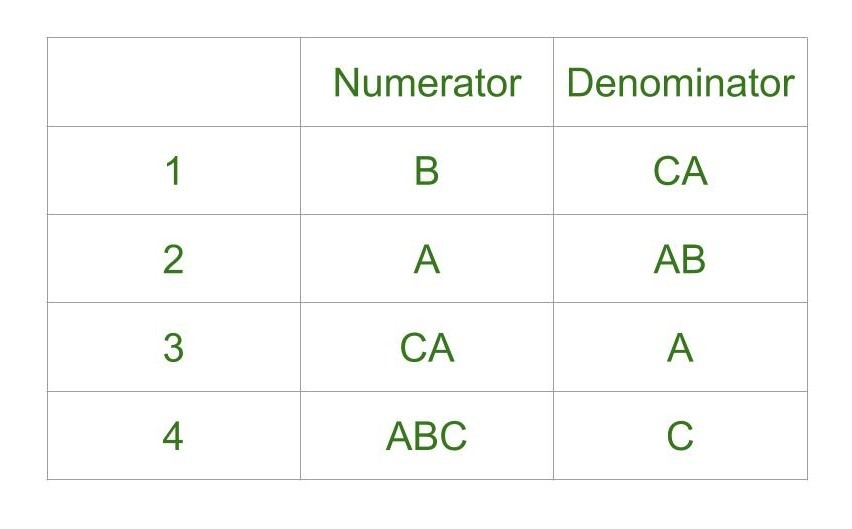

<br>

<h5>Undecidability of Post Correspondence Problem</h5>

Previously we mentioned how the Post Correspondence Problem is an undecidable problem, here is not a specific algorithm that proves that any Post Correspondence Problem will have a solution. We are all aware of the undecidablitiy of the Turing Machine, if we are able to lower the Turing Machine to the Post Correspondence Problem then we can prove that the Post Correspondence Problem is a basic undecidable problem.

We already know about undecidablitiy of Turing Machine. If we are able to reduce Turing Machine to PCP then we will prove that PCP is undecidable as well.

Lets look at an example of this:

Lets assume that the Turing machine (TM) simulaes the Post Correspondence Problem input string (S) can be represented as follows:

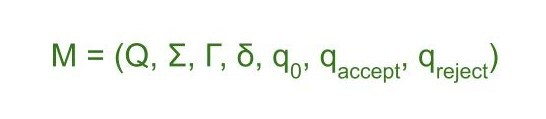


If a match occurs in the input string, then the Turing Machine will stop in an accepting state, this state is the acceptance problem. Just like the Turing Machine, we know the acceptance problem is undecidable, thus making the Post Correspondence Problem undecidable.

The full state of the machine consists of three parts (two changes to our Turing Machine and one change to our Post Correspondence Problem):

- The current contents of the tape.
- The current state of the finite state machine which operates the tape head.
- The current position of the tape head on the tape.

<br>

# The Bounded Post Correspondence Problem

****

<h5>What Are Variants?</h5>

There are many variants of the Post Correspondence Problem that have been examined, this is due to many reasons, an important reason is when one tries to prove undecidability of some new problem by reducing from the Post Correspondence Problem, typically the first reduction that is found is not from Post Correspondence Problem itself but from a weaker version. 

<h5>What Is The Bounded Post Correspondence Problem??</h5>

One of these variants is the Bounded Post Corresponence Problem, which is one the most important variants of the Post Corresponence Problem.

In the Bounded Post Correspondence Problem, if a match is found using more than a select number (k) of tiles, even including repeated tiles, one form of solution to the problem is the use of brute force search which will solve the problem in time of O (2k) but this has been proven difficult to improve on as this is an NP-complete problem. 

<br>

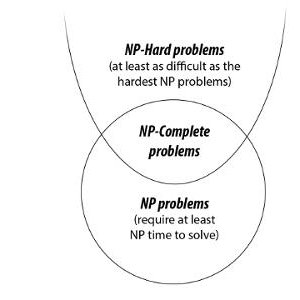


<br>

A problem is NP (nondeterministic polynomial) complete if its solution can be guessed and verified in polynomial time, in constrast to most NP-complete problems, a small variation of the Bounded Post Corresponence Problem was shown to be complete for RNP, this means that that it stays hard in the event of inputs chosen randomly as it it hard on average over evenly dispersed inputs.

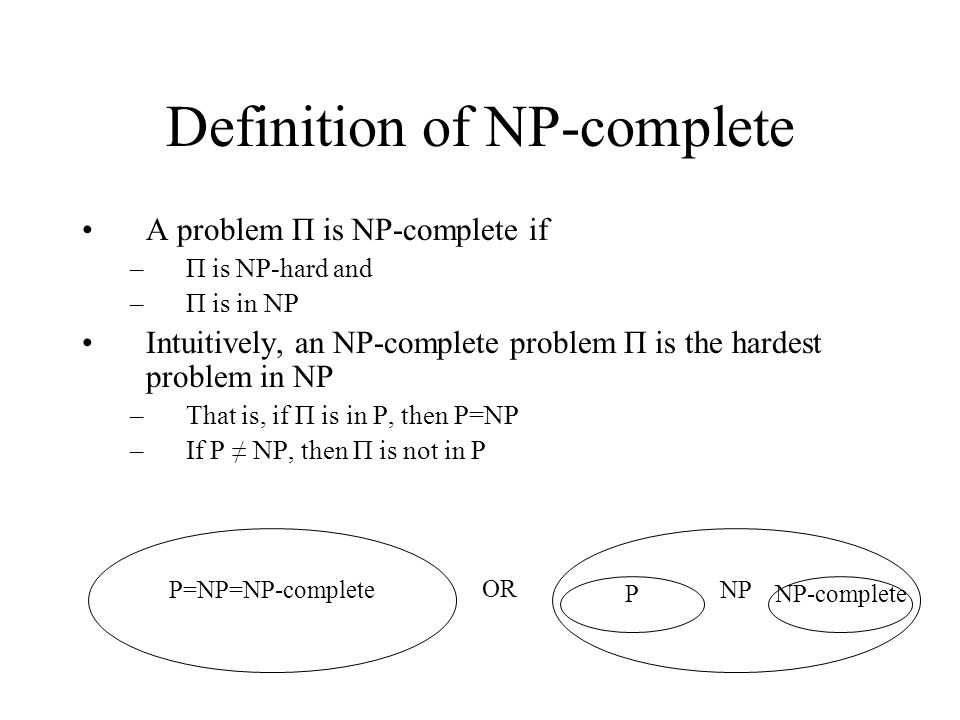

<br>

# Solving The Bounded Post Correspondence Problem

****

<h5>Solution</h5>

In [1]:
# This is a simple tree data structure implementation in python.
from treelib import Tree, Node

In [2]:
# Check for validation
def validation(L1, L2):
    if L1.startswith(L2) or L2.startswith(L1): 
        return True
    return False

In [3]:
# Check to see is a solution
def solver(L1, L2):
    return L1 == L2

In [4]:
# a = A list of strings
# b = Another list of strings
# k = The number of iterations
def find_solution(a, b, k):
    # These are our main initializers
    results = []
    map = Tree()
    
    # The parent node begins with an empty string
    root = ['']
    map.create_node(tag='', identifier='')

    while len(root) > 0:
        obj = root.pop()

        for i in range(0, len(a)):
            # The depth function makes sure we do not surpass the depth of a single node
            if map.depth(obj) == k:
                break

            x = obj.split()
            a2 = ""
            b2 = ""
            
            # The parent node string is returned and appended, if not the node is the root
            if len(x) > 1:
                a2 =  x[0] + a[i] 
                b2 = x[1] + b[i]
            else:
                a2 = a[i] 
                b2 = b[i]
            
            # The node is reviewed for validation, if valid the node if a prefix
            if validation(a2, b2):
                check = a2 + ' ' + b2
                
                # The node is looked into to see if there is a solution
                if solver(a2, b2):
                    results.append(check)
                
                # The tree node is created for validation
                map.create_node(tag=check, identifier=check, parent=obj)
                root.append(check)  
    
    # Then return the valid solution
    return results

In [5]:
# Here is our first test with 2 list of strings with 6 number of iterations
# A = {aa, bb, abb}
# b = {aab, ba, b}
def example_one():
    a = 'aa', 'bb', 'abb'
    b = 'aab', 'ba', 'b'

    results = find_solution(a, b, 6)
    for r in results:
        print(r)

print("Example 1")
print("=======================================================================================================================")
example_one()
print("=======================================================================================================================")

Example 1
aabbaaabb aabbaaabb


In [6]:
# Here is our first test that takes 2 list of strings with 8 number of iterations
# A = {1, 10, 011}
# b = {101, 00, 11}
def example_two():
    a = '1','10','011'
    b = '101','00','11'

    results = find_solution(a, b, 8)
    for r in results:
        print(r)
        
print("Example 2")
print("=======================================================================================================================")
example_two()
print("=======================================================================================================================")

Example 2
101110011 101110011
101110011101110011 101110011101110011


In [7]:
# Here is our first test with 2 strings with 12 number of iterations
# A = {abab, aaabbb, aab, ba, ab, aa}
# b = {ababaaa, bb, baab, baa, ba, a}
def example_three():
    a = 'abab','aaabbb','aab','ba','ab','aa'
    b = 'ababaaa','bb','baab','baa','ba','a'

    results = find_solution(a, b, 12)
    for r in results:
        print(r)

print("Example 3")
print("=======================================================================================================================")
example_three()

Example 3
baaa baaa
baaabaaa baaabaaa
baaabaaabaaa baaabaaabaaa
baaabaaabaaabaaa baaabaaabaaabaaa
baaabaaabaaabaaabaaa baaabaaabaaabaaabaaa
baaabaaabaaabaaabaaabaaa baaabaaabaaabaaabaaabaaa
baaabaaabaaabaaabaabaa baaabaaabaaabaaabaabaa
baaabaaabaaabaaabaababaa baaabaaabaaabaaabaababaa
baaabaaabaaabaaaababaaaaaa baaabaaabaaabaaaababaaaaaa
baaabaaabaaabaaaababaaabbbaab baaabaaabaaabaaaababaaabbbaab
baaabaaabaaabaaaababaaabbbabaab baaabaaabaaabaaaababaaabbbabaab
baaabaaabaaabaabaa baaabaaabaaabaabaa
baaabaaabaaabaabaabaaa baaabaaabaaabaabaabaaa
baaabaaabaaabaabaabaabaa baaabaaabaaabaabaabaabaa
baaabaaabaaabaabaaababaaabbbaab baaabaaabaaabaabaaababaaabbbaab
baaabaaabaaabaababaa baaabaaabaaabaababaa
baaabaaabaaabaababaabaaa baaabaaabaaabaababaabaaa
baaabaaabaaabaabababaa baaabaaabaaabaabababaa
baaabaaabaaabaababababaa baaabaaabaaabaababababaa
baaabaaabaaaababaaaaaa baaabaaabaaaababaaaaaa
baaabaaabaaaababaaaaaabaaa baaabaaabaaaababaaaaaabaaa
baaabaaabaaaababaaaaabaa baaabaaabaaaababaaaaabaa


ababaaaaabaaababaaaaaabaaa ababaaaaabaaababaaaaaabaaa
ababaaaaabaaababaaaaaabaabaa ababaaaaabaaababaaaaaabaabaa
ababaaaaabaaababaaaaaaababaaabbbaab ababaaaaabaaababaaaaaaababaaabbbaab
ababaaaaabaaababaaaaabaa ababaaaaabaaababaaaaabaa
ababaaaaabaaababaaaaabaabaaa ababaaaaabaaababaaaaabaabaaa
ababaaaaabaaababaaaaababaa ababaaaaabaaababaaaaababaa
ababaaaaabaaababaaaaabababaa ababaaaaabaaababaaaaabababaa
ababaaaaabaaababaaabbbaab ababaaaaabaaababaaabbbaab
ababaaaaabaaababaaabbbabaab ababaaaaabaaababaaabbbabaab
ababaaaaabaaababaaabbbababaab ababaaaaabaaababaaabbbababaab
ababaaaaabaaababaaabbbabababaab ababaaaaabaaababaaabbbabababaab
ababaaaaabaaababaaabbbababababaab ababaaaaabaaababaaabbbababababaab
ababaaaaabaaababaaabbbababaabbaaa ababaaaaabaaababaaabbbababaabbaaa
ababaaaaabaaababaaabbbabaabbaaa ababaaaaabaaababaaabbbabaabbaaa
ababaaaaabaaababaaabbbabaabbaabaa ababaaaaabaaababaaabbbabaabbaabaa
ababaaaaabaaababaaabbbabaabababaaabbbaab ababaaaaabaaababaaabbbabaabababaaabbbaab
ababaaaaabaaab

<br>

# What Is An Undecidable Problem Is In Computability Theory

****

<h5>Definition of an Undecidable Problem</h5>

Typically, problems that take lengthy time to solve, an algorithm is constructed to produce estimated results but there are also problems that remain impossible to solve.

In regards to computability theory, an undecidable problem is a decision problem (a yes or no question based on an infinite set of inputs) where we can't construct an algorithm for the problem to be answeredn sufficiently in infinite time.

An undecidable problem can be related to a host of different topics such as abtract machines (The Halting Problem), logic (The Hilbert's Entscheidungsproblem), analysis (Richardson's theorem), formal languages and grammar (The Post Correspondence Problem), topology, matrices (The Mortal Matrix Problem) and combinatorial group theory (The Conjugacy Problem).

<h5>An Example of an Undecidable Problem</h5>

In 1936, Alan Turning demonstrated one of the first cases that an undeciable problem did exist by discovering the <i>The Halting Problem</i>, which became an example of the limits of determinism in computability theory.

The Halting Problem is an undeciable problem where no program (Turing Machine) can be written that can predict whether or not any other program halts after a finite number of steps.

Other examples of undecidable problems include:

- The Hilbert's Tenth Problem.
- The Mortal Matrix Problem
- The Whitehead Problem 

In this notebook we looked at the Post Correspondence Problem as an undecidable problem, there is also an extension of this problem called the Infinite Post Correspondence where the original problem is extended into infinite correspondences, more information on this problem can be found in the book <i>Undecidable problems for probabilistic automata of fixed dimension</i> by authors V. D. Blondel and V. Canterini.

***
## End